## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# boston = datasets.load_boston() -> descontinuado
# X = pd.DataFrame(boston.data, columns = boston.feature_names)
# y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [151]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
boston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [152]:
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [153]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [154]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [155]:
X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [156]:
y = pd.get_dummies(y, drop_first = True)
print(y.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medv    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
None


,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


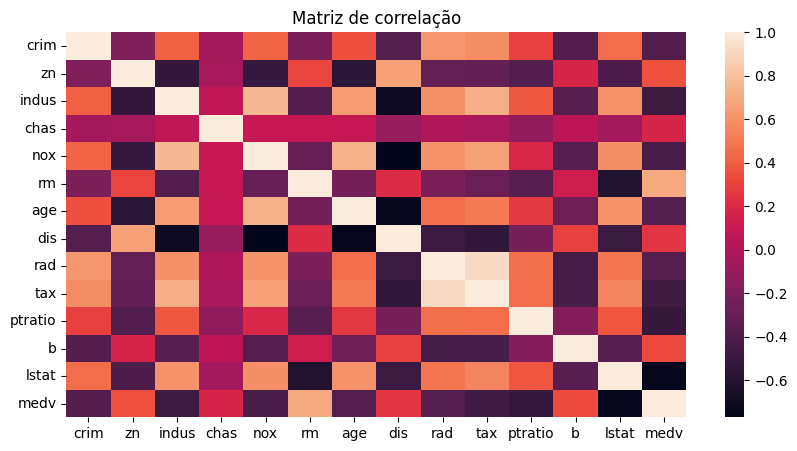

In [157]:
plt.figure(figsize=(10,5))
plt.title("Matriz de correlação")
sns.heatmap(boston.corr())
plt.show()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [159]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [160]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,71
O MSE da árvore com profundidade=8 é: 0,98


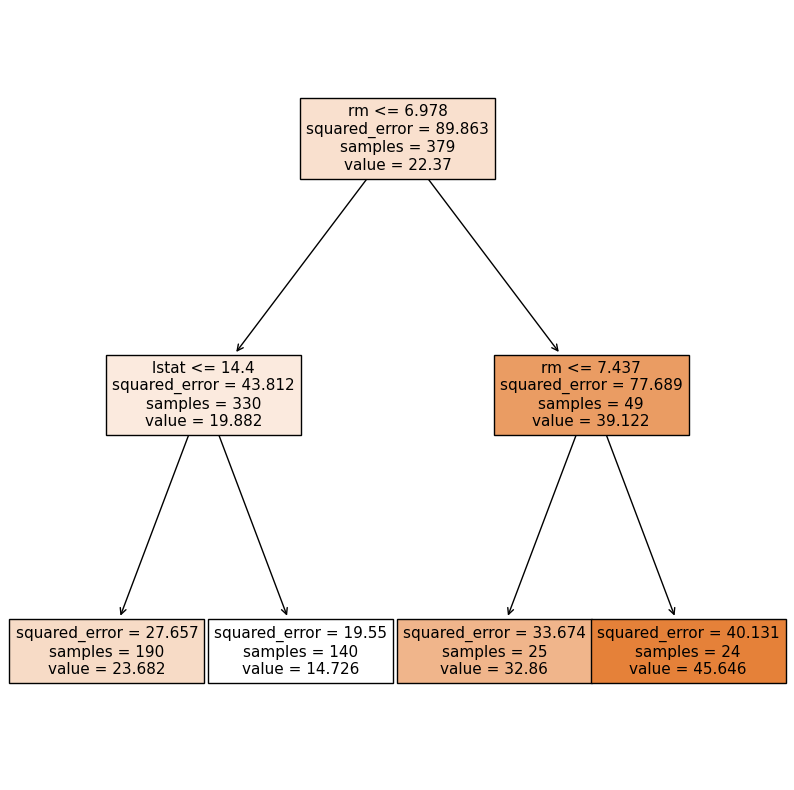

In [161]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [162]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.        ,  5.28170375, 17.06061075, 41.67185681]),
 'impurities': array([25.84925111, 31.13095486, 48.19156561, 89.86342242])}

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [164]:
# lista de arvores
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.281703754061601, random_state=0),
 DecisionTreeRegressor(ccp_alpha=17.060610749709312, random_state=0),
 DecisionTreeRegressor(ccp_alpha=41.67185680975389, random_state=0)]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [165]:
mse_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

mse_scores

[27.316456692913388, 31.848059230059402, 43.35036687648702, 68.27939643491125]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

In [166]:
ccp_alphas = [0.0, 5.281703754061557, 17.06061074970897, 41.67185680975389]
clfs = [DecisionTreeRegressor(random_state=0, ccp_alpha=alpha) for alpha in ccp_alphas]


In [167]:
for clf in clfs:
  clf.fit(X_train, y_train)


mse_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]


In [168]:
#O índice do mínimo MSE
min_mse_index = np.argmin(mse_scores)
min_alpha = ccp_alphas[min_mse_index]
min_mse = mse_scores[min_mse_index]

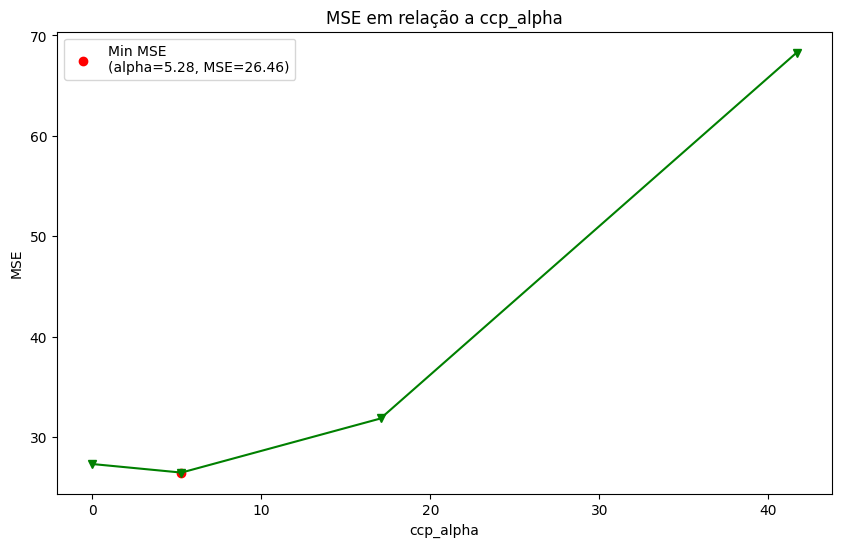

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_scores, marker='v', linestyle='-', color='g')
plt.title('MSE em relação a ccp_alpha')
plt.xlabel('ccp_alpha')
plt.ylabel('MSE')


plt.scatter(min_alpha, min_mse, color='r', label=f'Min MSE\n(alpha={min_alpha:.2f}, MSE={min_mse:.2f})')
plt.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [170]:
chosen_model = DecisionTreeRegressor(random_state=0, ccp_alpha = chosen_alpha)

chosen_model.fit(X_train, y_train)
y_pred = chosen_model.predict(X_test)

r2 = r2_score(y_test, y_pred)


In [171]:
print(f"O R-quadrado para o modelo com ccp_alpha = {chosen_alpha} é: {r2:.4f}")

O R-quadrado para o modelo com ccp_alpha = 5.281703754061557 é: 0.6100


### 7. Visualize esta árvore.

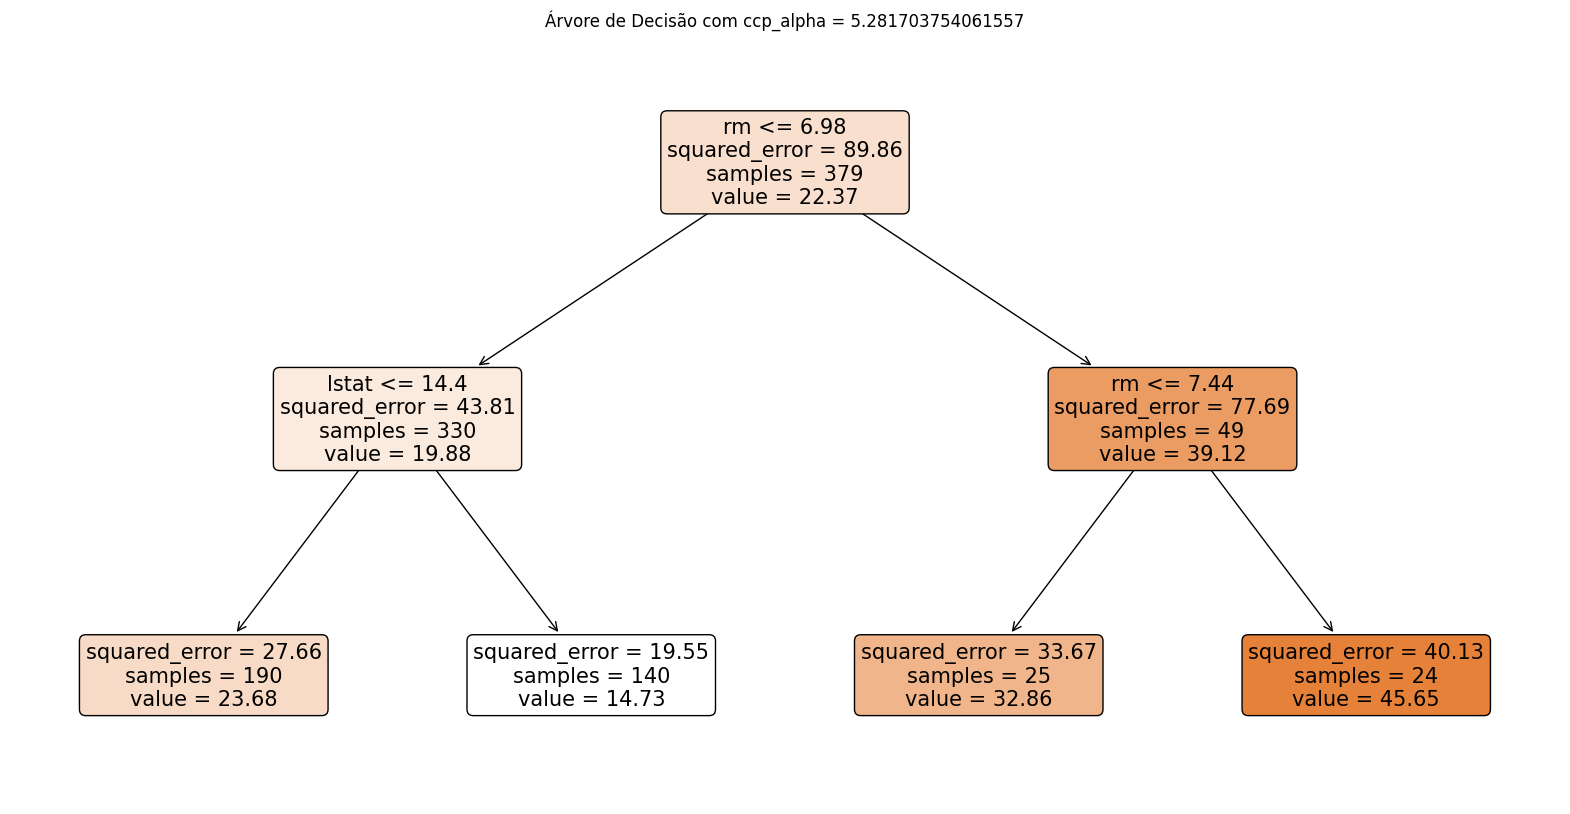

In [174]:
plt.figure(figsize=(20, 10))
plot_tree(chosen_model,
          filled = True,
          feature_names = list(X_train.columns),
          rounded = True,
          precision = 2,
          fontsize = 15)

plt.title(f'Árvore de Decisão com ccp_alpha = {chosen_alpha}')

plt.show()